## Created by
# Merlijn Sevenhuijsen  | merlijns@kth.se   | 200104073275
# Hugo Westergård       | hugwes@kth.se     | 200011289659


In [260]:
import problem_1 as mz
import numpy as np

Within this model there are two objects that are continuously moving. Namely the player and the Minotaur. The player can move in any direction (up, down, left, right) or stay in the same position. The Minotaur can move in any direction (up, down, left, right). The state space is the set of all possible positions of the player and the Minotaur in the maze. However, there is one  Moreover if the player is caught then it is impossible to get any future rewards, or move out of the current position.

$$\mathcal{S} = \big\lbrace ((i,j), (k,l)):\textrm{such that the cell} (i,j) \textrm{ is not an obstacle or (k, l) and (k,l)}$$
$$\textrm{is not a boundary} \big\rbrace | \textrm{caught}.$$
\textbf{Action space} $\mathcal{A}$
We cannot control the Minotaur, but we can control the player. Therefore we have five options: move `left`, `right`, `down`, `up` and `stay`. Just like lab0 we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$
\textbf{Transition probabilities} $\mathcal{P}$
At a state (or position) $s$ taking any action will always lead to a different state (position or caught) $s'$, then $\mathbb{P}(s' \vert s, a) = \frac{1}{m}$. This is due to the Minotaur always being able to move and it not going into the walls. Note that it depends on the amount of possible moves for the Minotaur, called $m$. If the Minotaur is in the bottom right corner, then it can only move left and up. This leads to two possibilities for each action. 

An exception to this is that it is possible that the Minotaur catches the player. In that case the next state will be caught, thus $p(caught | s, a) = \frac{1}{m}$ if the action a would lead to the position of the player, $(i, j)$ being the same as the Minotaur $(k, l)$, thus $i=k, j=l$. 

If the player is caught then it will always go to the caught state $caught$, then for any action $a$ $\mathbb{P}(caught \vert caught, a) = 1$.

\textbf{Rewards} $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the Minotaur.
If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
If at state $s$, taking action $a$, leads to the Minotaur then $r(s,a) = -\infty$
If at state $caught$, taking any action $a$ lead to $r(caught,a) = -\infty$
If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor the Minotaur nor an obstacle, then $r(s, a) = -1$.
If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 


We start with the MDP definition of the situation where the player and the Minotaur move by alternating.

\textbf{State space} $\mathcal{S}$

Within this model there is only one object that can be moved, namely the player. The Minotaur moves as well but when the player takes an action this does not move the Minotaur directly. The player can move in any direction (up, down, left, right) or stay in the same position.  The state space is the set of all possible positions of the player. Here the assumption was made that the player only moves and that each round the Minotaur is seen as an obstacle. This is done as the transitions now are certain and only move the player instead of the Minotaur as well. The Minotaur can be seen as a type of wall, which occupies five spaces. Namely the direct position and all the direct neighbours (by moving up, down, left and right one time). The only difference with the difference with moving simultaneously is that now the player cannot swap positions with the Minotaur, as this will end up directly on the Minotaur and give a large negative reward. This will elaborated upon later.

$$\mathcal{S} = \big\lbrace (i,j):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle nor the Minotaur }\big\rbrace | caught.$$
\textbf{Action space }$\mathcal{A}$
The five options remain the same, move `left`, `right`, `down`, `up` and `stay`. we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 
$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$
\textbf{Transition probabilities} $\mathcal{P}$

At a state (or position) $s$ taking any action will now lead to a guaranteed next always lead to a next state as the Minotaur does not move with the action of the player anymore. Thus $s'$, then $\mathbb{P}(s' \vert s, a) = 1$.
The exception to this is that when the player moves close Minotaur we have to take into account the possibility of the Minotaur moving towards the player. If the player moves on the Minotaur using action $a$ then the next state is caught: $P(caught|s, a)$. If the player moves towards a place where the Minotaur is one step away by any possible action, then $P(caught|s, a) = \frac{1}{m}$ to still account for the randomness of the Minotaur catching the player. Here $m$ depends on the possible next actions of the Minotaur.

If the player is caught then it will always go to the caught state $caught$, then for any action $a$ $\mathbb{P}(caught \vert caught, a) = 1$.

\textbf{Rewards} $\mathcal{R}$

The objective of the player is to find the exit of the maze while avoiding the obstacles and the Minotaur. 

*  If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
*  If at state $s$, taking action $a$, leads to the Minotaur then $r(s,a) = -\infty$
*  If at state $s$, taking action $a$, leads to a place where the Minotaur can move in one time-step then $r(s,a) = -\infty$
*  If the player is in state caught then any action $a$ will lead to $r(caught, a) = -\infty$
*  If at state $s$, taking action $a$, leads to some other position in the maze that is not a wall, obstacle, or Minotaur position, then $r(s, a) = -1$
*  If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$

The difference between moving simultaneously and non-simultaneously is that the player cannot be in the exact position of the Minotaur. When they move simultaneously the player can swap places with the Minotaur without a punishment of getting caught. However, when the player and the Minotaur move by alternating then this is not possible anymore. The move of the player will always end up with the Minotaur on the same position.

When the Minotaur moves after the player one position more is occupied, due to swapping positions with the Minotaur not being possible. This means that the Minotaur has a higher probability probability of catching you.

1c) Solve the exercise using dynamic programming. Show the policy. It is assumed that the MDP where both the player and the Minotaur move simultaneously is used.

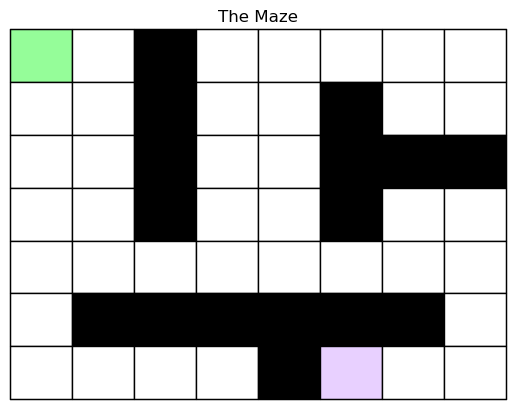

In [261]:
"""This is the maze, where the following numbers correspond to the following objects:
0 = empty cell      -> white
1 = obstacle        -> black
2 = end             -> light purple
3 = start           -> light green
4 = minotaur        -> light red
"""
maze = np.array([
    [3, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env = mz.Maze(maze)

# Draw the maze
mz.draw_maze(maze)

In [262]:
# Finite horizon
horizon = 20

# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env, horizon)

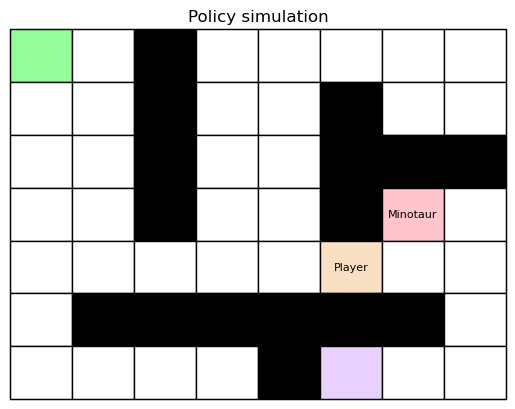

In [263]:
# Simulate with a static minotaur 
method = 'DynProg'
starting_position_minotaur = (3, 6)
path = env.simulate_solo(policy, method, starting_position_minotaur);

mz.animate_solution(maze, path)

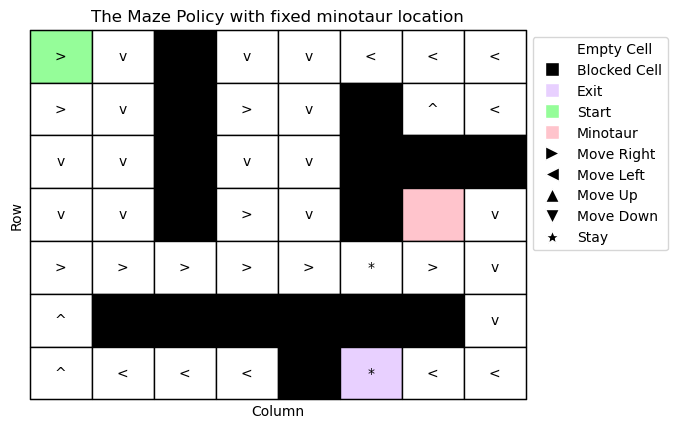

In [264]:
# Show the policy in the same case where the minotaur is static
env = mz.Maze(maze)
env.explain_policy(policy, starting_position_minotaur)

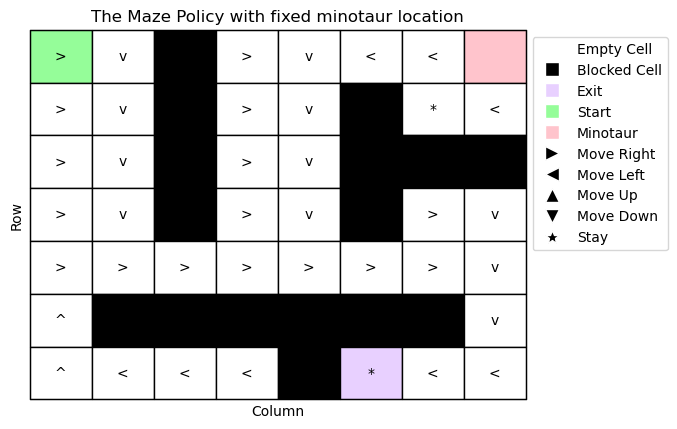

In [265]:
# Show the policy in the case where the minotaur is in the top right
starting_position_minotaur = (0, 7)
env = mz.Maze(maze)
env.explain_policy(policy, starting_position_minotaur)

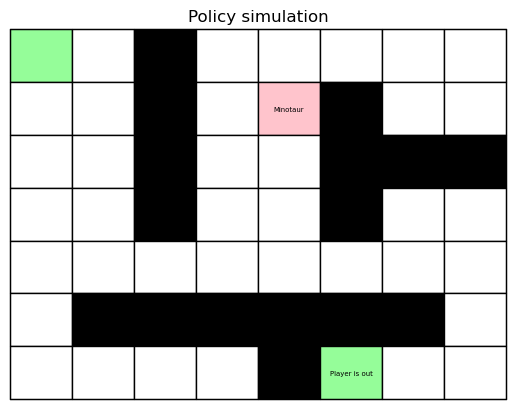

In [266]:
# Simulate with a moving minotaur (randomly)  
path = env.simulate(policy, method)

mz.animate_solution(maze, path)

## 1d) Probability without the minotaur standing still, for the optimal policy at T = 30


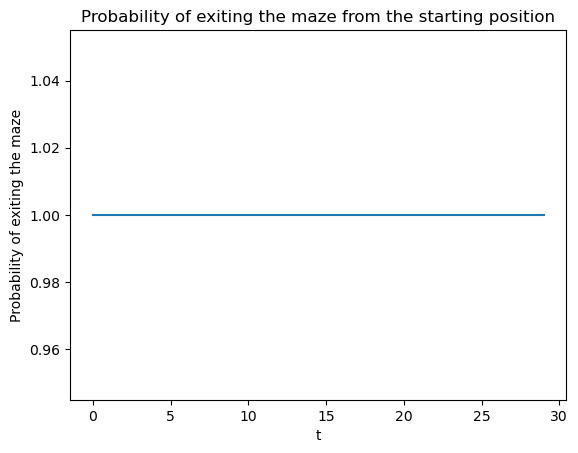

In [267]:
# Calculate the probability of reaching the exit starting from position A
horizon = 30
maze2 = np.array([
    [3, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env = mz.Maze(maze2, minotaur_stay_enabled=False)

# Get the policy
V, policy = mz.dynamic_programming(env, horizon)
prob_history = env.dynamic_programming_probability_exiting(horizon, policy)

# Make a plot from the probability history
import matplotlib.pyplot as plt
plt.plot(prob_history)
plt.xlabel('t')
plt.ylabel('Probability of exiting the maze')
plt.title('Probability of exiting the maze from the starting position')
plt.show()


## Probability with the minotaur standing still, for the optimal policy at T = 30


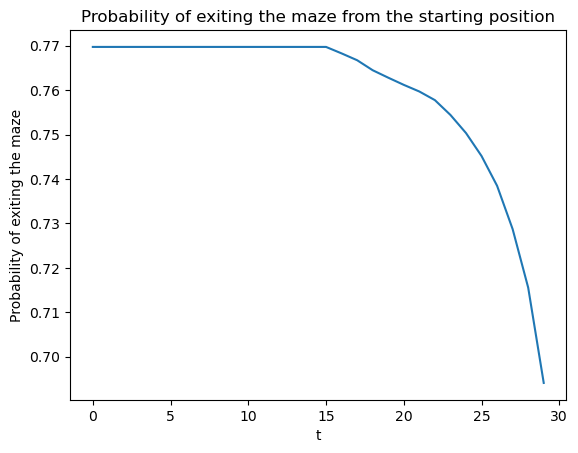

In [268]:
env = mz.Maze(maze2, minotaur_stay_enabled=True)

# Get the policy
V, policy = mz.dynamic_programming(env, horizon)
prob_history = env.dynamic_programming_probability_exiting(horizon, policy)

# Make a plot from the probability history
import matplotlib.pyplot as plt
plt.plot(prob_history)
plt.xlabel('t')
plt.ylabel('Probability of exiting the maze')
plt.title('Probability of exiting the maze from the starting position')
plt.show()


## Probability without the minotaur standing still, for the optimal policy at T = 1 up to T = 30

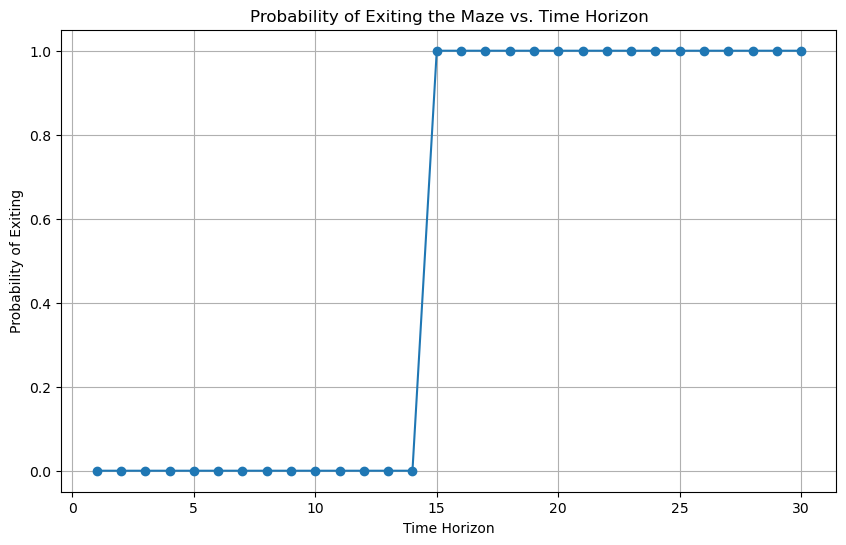

In [269]:
env = mz.Maze(maze2, minotaur_stay_enabled = False)
    
time_horizons = range(1, 31)
exit_probabilities = []
for T in time_horizons:
    # Compute the optimal policy using dynamic programming
    _, policy = mz.dynamic_programming(env, T)

    # Calculate the probability of exiting the maze
    exit_probabilities.append(env.dynamic_programming_probability_exiting2(T, policy)) 
# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(time_horizons, exit_probabilities, marker='o')
plt.xlabel('Time Horizon')
plt.ylabel('Probability of Exiting')
plt.title('Probability of Exiting the Maze vs. Time Horizon')
plt.grid(True)
plt.show()

## Probability with the minotaur standing still, for the optimal policy at T = 1 up to T = 30

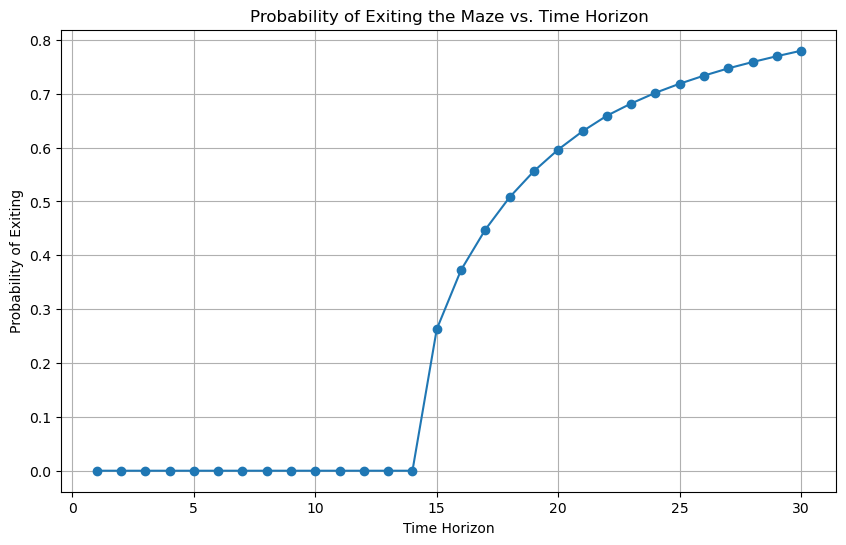

In [270]:
env = mz.Maze(maze2, minotaur_stay_enabled = True)
    
time_horizons = range(1, 31)
exit_probabilities = []
for T in time_horizons:
    # Compute the optimal policy using dynamic programming
    _, policy = mz.dynamic_programming(env, T)

    # Calculate the probability of exiting the maze
    exit_probabilities.append(env.dynamic_programming_probability_exiting2(T, policy)) 

# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(time_horizons, exit_probabilities, marker='o')
plt.xlabel('Time Horizon')
plt.ylabel('Probability of Exiting')
plt.title('Probability of Exiting the Maze vs. Time Horizon')
plt.grid(True)
plt.show()

In [271]:
env = mz.Maze(maze2, minotaur_stay_enabled = False)
    
T = 29
_, policy = mz.dynamic_programming(env, T)
prob_exit = env.dynamic_programming_probability_exiting2(T, policy)

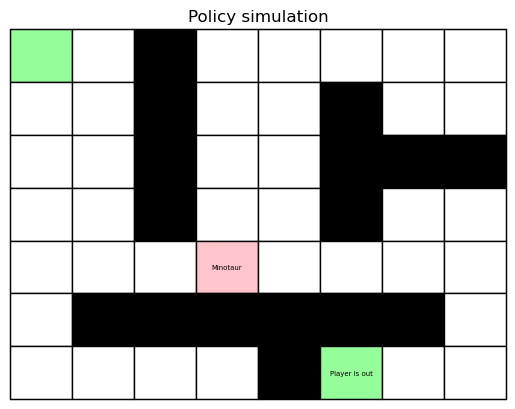

In [272]:
# Simuate a shortest path
method = 'DynProg'
path = env.simulate(policy, method)

mz.animate_solution(maze, path)


## 1e & 1f - Value iteration, the minotaur cannot stand still

10000


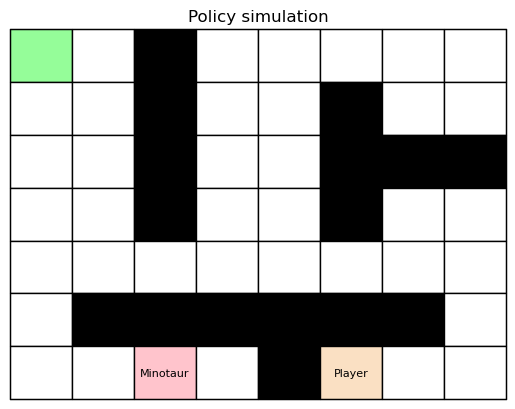

In [273]:
env = mz.Maze(maze2, False)

# Discount Factor
gamma   = 29 / 30

# Accuracy treshold
epsilon = 0.001

# The max number of iterations to run the algorithm
max_iter = 30

V, policy = mz.value_iteration(env, gamma, epsilon, max_iter)
method = 'ValIter'

# Simulate with a static minotaur
path = env.simulate(policy, method)

#Show the shortest path 
mz.animate_solution(maze, path)

# Amount of exits
exit_n = 0
total_n = 0
ITERATION_COUNT = 10000

# Simulate with a moving minotaur (randomly)
for i in range(ITERATION_COUNT):
    # Simulate with a static minotaur
    path = env.simulate(policy, method)

    # If the path ends in the exit, increment the number of exits
    if path[-1][0] == (6,5):
        exit_n += 1

    # Increment the total number of iterations
    total_n += 1
exit_n / total_n

print(exit_n)

## 1f) Simulate 10000 games when the minotaur cannot stand still

In [274]:
env = mz.Maze(maze2, minotaur_stay_enabled=False)

# Discount Factor
gamma   = 29 / 30

# Accuracy treshold
epsilon = 0.001

# The max number of iterations to run the algorithm
max_iter = 100

V, policy = mz.value_iteration(env, gamma, epsilon, max_iter)
method = 'ValIter'

# Simulate with a static minotaur
path = env.simulate(policy, method, l=gamma)

#Show the shortest path 
# mz.animate_solution(maze, path)

# Amount of exits
exit_n = 0
total_n = 0
ITERATION_COUNT = 10000

# Simulate with a moving minotaur (randomly)
for i in range(ITERATION_COUNT):
    # Simulate with a static minotaur
    path = env.simulate(policy, method, l=gamma)

    # If the path ends in the exit, increment the number of exits
    if path[-1][0] == (6,5):
        exit_n += 1

    # Increment the total number of iterations
    total_n += 1

print(exit_n / total_n)

0.6179


## 1f) Simulate 10000 games when the minotaur cannot stand still

In [275]:
env = mz.Maze(maze2, minotaur_stay_enabled=True)

# Discount Factor
gamma   = 29 / 30

# Accuracy treshold
epsilon = 0.001

# The max number of iterations to run the algorithm
max_iter = 100

V, policy = mz.value_iteration(env, gamma, epsilon, max_iter)
method = 'ValIter'

# Simulate with a static minotaur
path = env.simulate(policy, method, l=gamma)

#Show the shortest path 
# mz.animate_solution(maze, path)

# Amount of exits
exit_n = 0
total_n = 0
ITERATION_COUNT = 10000

# Simulate with a moving minotaur (randomly)
for i in range(ITERATION_COUNT):
    # Simulate with a static minotaur
    path = env.simulate(policy, method, l=gamma)

    # If the path ends in the exit, increment the number of exits
    if path[-1][0] == (6,5):
        exit_n += 1

    # Increment the total number of iterations
    total_n += 1

print(exit_n / total_n)

0.2352


1g)

What does it mean that a learning method is on-policy or off-policy?
On-Policy Learning:
On-policy learning methods learn the value of the policy being followed, meaning they evaluate or improve the policy that is used to make decisions. The key characteristic of on-policy methods is that they attempt to evaluate or improve the policy that dictates the agent's actions. An example of an on-policy algorithm is SARSA (State-Action-Reward-State-Action), where the learning process follows the policy the agent is actually executing, and updates are made based on the actions taken by the current policy.

Off-Policy Learning:
Off-policy methods learn the value of an optimal policy independently of the agent's actions. They evaluate or improve a policy different from the one used to generate the data. This means that the learning algorithm can learn from actions that are outside its current policy, such as from a fixed dataset of experiences, or from the actions chosen by a different policy. An example of an off-policy method is Q-learning, where the learning process updates its estimates based on the maximum reward of the next state, regardless of the action taken by the current policy.

State the convergence conditions for Q-learning and SARSA.

Q-learning is guaranteed to converge to the optimal action-value function Q*(s,a), provided the following conditions are met:
- The policy has a chance to visit all state-action pairs infinitely often. This is often ensured through adequate exploration, such as using an ε-greedy policy that has a non-zero probability of selecting any action.
- The learning rate α follows certain conditions, typically it must decrease over time and satisfy the criteria 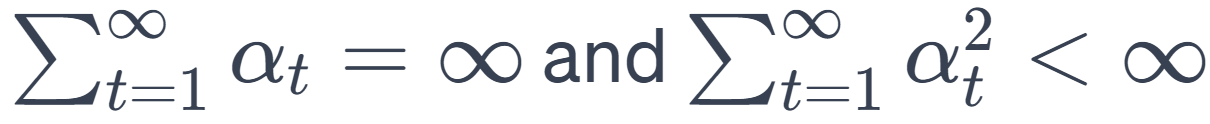 These conditions ensure that the learning rate is high enough to continue learning indefinitely but decays in such a way that the value function estimates eventually converge.
- The environment and the reward function must be stationary, meaning they do not change over time.

SARSA also converges to the optimal action-value function under similar conditions as Q-learning:

- All state-action pairs must be visited infinitely often, which is usually achieved through sufficient exploration (e.g., ε-greedy approach).
- The learning rate α must satisfy the same criteria as for Q-learning, ensuring it decays appropriately over time.
- The environment and reward function should be stationary.
- Additionally, the policy being followed must also converge to a policy that is greedy with respect to the Q-value estimates. This is because SARSA's updates depend on the policy followed (as it's an on-policy method), and for convergence, this policy must stabilize.



1h)

Altering the State Space:
Key Collection: The state must reflect whether the keys have been collected. This can be a binary part of the state (e.g., keys collected or not). Now the state space will consist of the location of the user, the location of the Minotaur and the key.

Adjusting the Transition Probabilities:
Player's Movement: The transition probabilities for the player's movement remain largely the same, except for the key and the transition probabilities of the Minotaur. All the transitions to the tile C will transition to a state where the user also has a key. 
Minotaur's Movement: The Minotaur's movement probabilities are modified so that there's a 35% chance it moves toward the player and a 65% chance it moves randomly in any direction. This means that there is a 51.25% chance to move towards the player and a 16.25% chance to move in every other direction in the case that all four directions are possible for the Minotaur. This is due to the random action also having a possibility of going towards the player.

Modifying the Reward Structure:
Key Collection Reward: Introduce a reward for collecting the keys, encouraging the policy to direct the player towards them. This reward will be 0, thus $R(s, a)=0$ if action $a$ in state $s$ leads to the state $(0, 7)$.
The reward for reaching the exit now only gives a reward if the key is obtained. Otherwise it will just give a $-1$ as usual.

The discount factor $\gamma$ is set to $49/50$, for the reasoning please look in the report.